# Telco-Customer-Churn

## Problem Statement: “Telco-Customer-Data" dataset consists of customers who have left or retained their service in a Telco-company. Columns contain information like if a person is male or female, senior citizen or not, Internet service type, Contract type, how long they have been a customer, Customer account information and rows represents each unique customer. By understanding customer’s attributes in this dataset we are going to predict the Churn by using Machine Learning Algorithms.

## DATA READ:

In [1]:
#import required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import pickle


In [2]:
#reading the dataset
df=pd.read_csv('../data/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## EDA (Exploratory Data Analysis) :

In [5]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
#isna() to check null values and sum() to add those null values in dataset
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Visualization

<Axes: xlabel='gender', ylabel='count'>

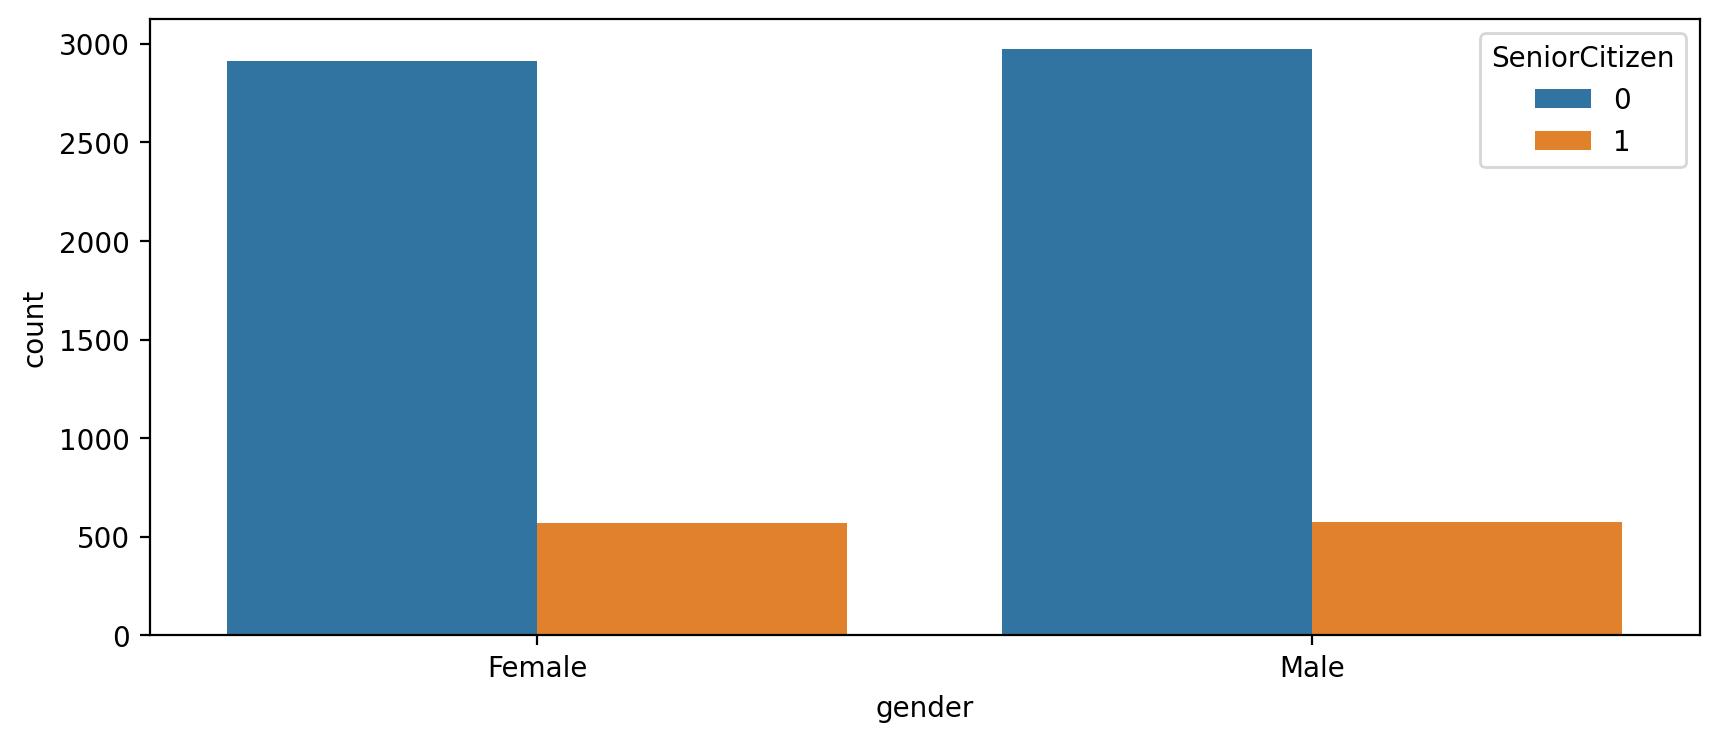

In [9]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='gender',hue='SeniorCitizen')

<Axes: xlabel='InternetService', ylabel='count'>

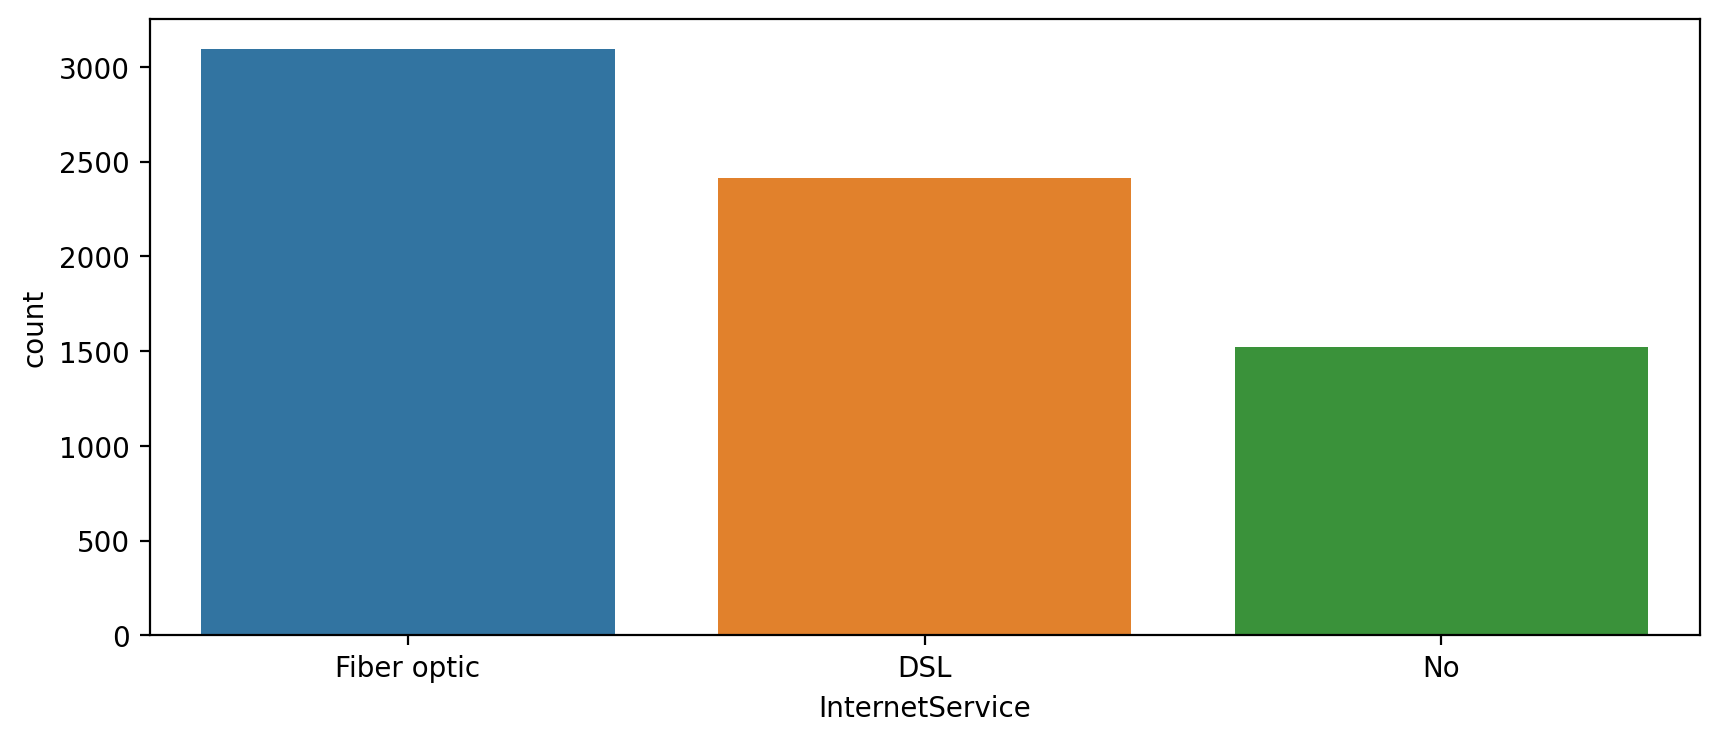

In [10]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='InternetService',order=df['InternetService'].value_counts().index)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

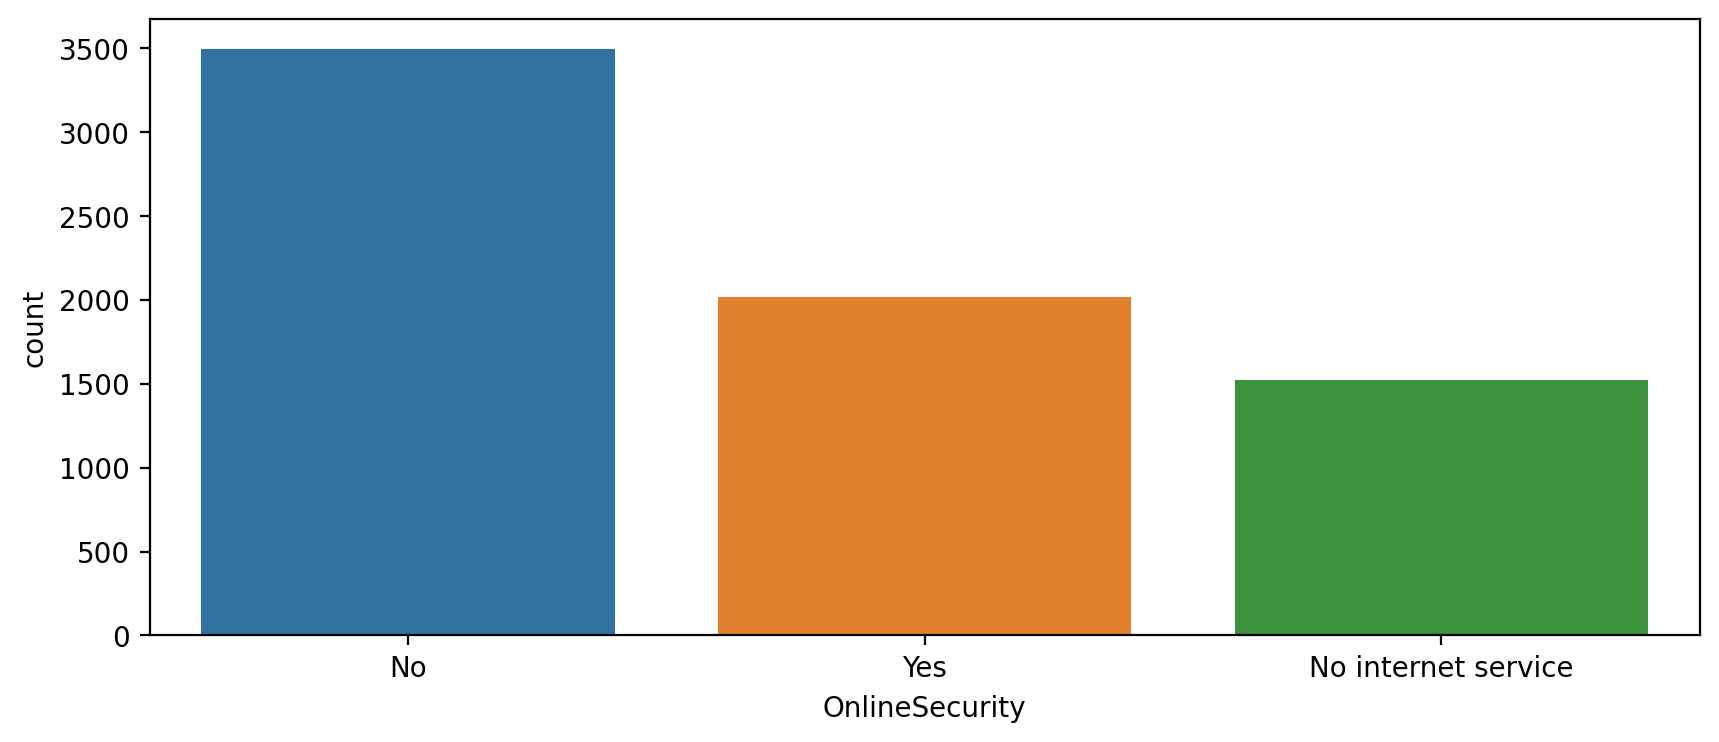

In [11]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='OnlineSecurity')

<Axes: xlabel='PaymentMethod', ylabel='count'>

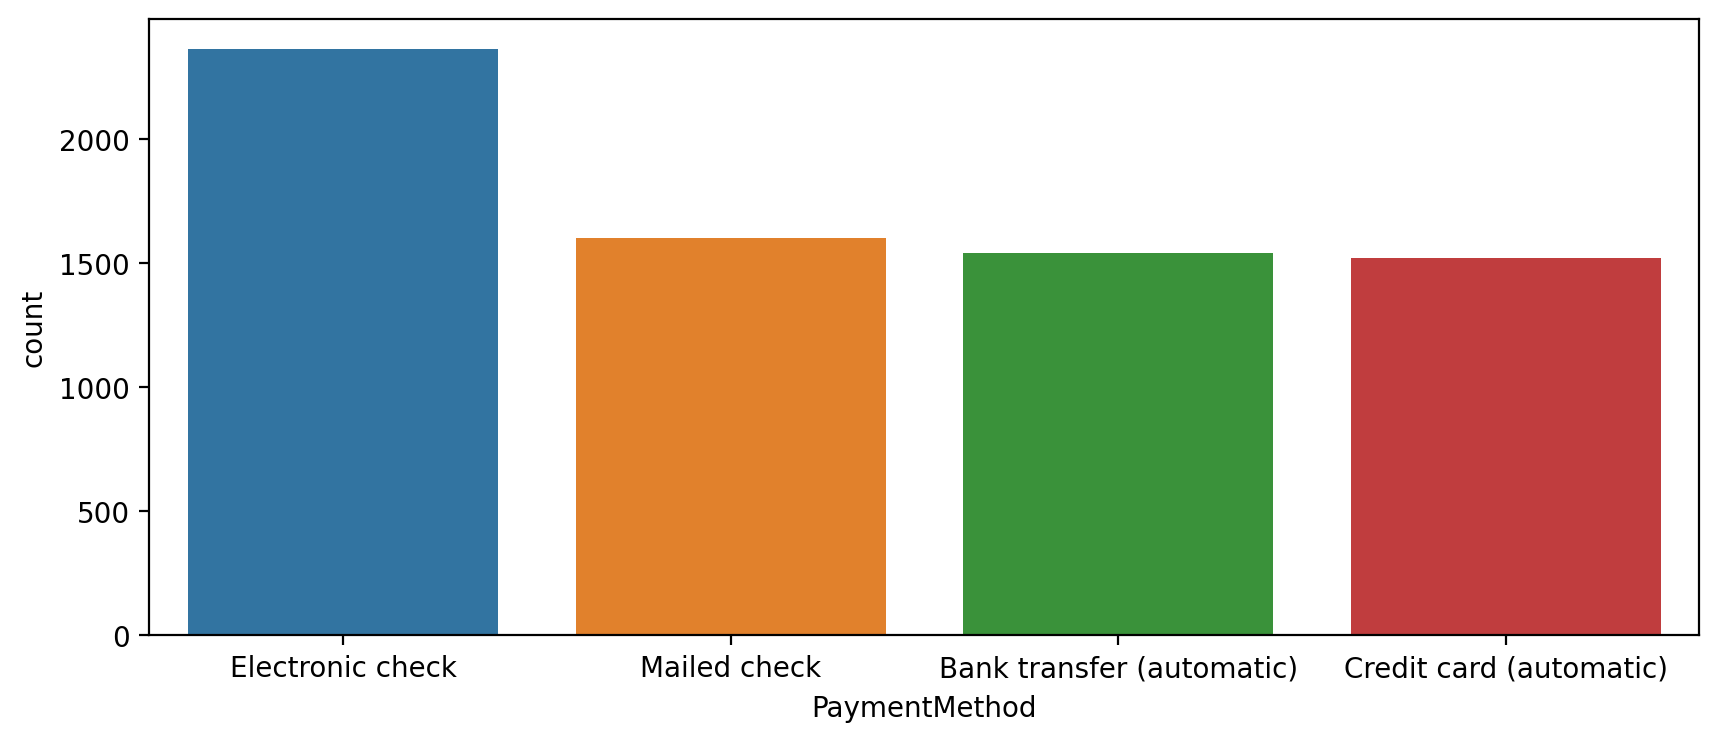

In [12]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='PaymentMethod')

<Axes: xlabel='Churn', ylabel='count'>

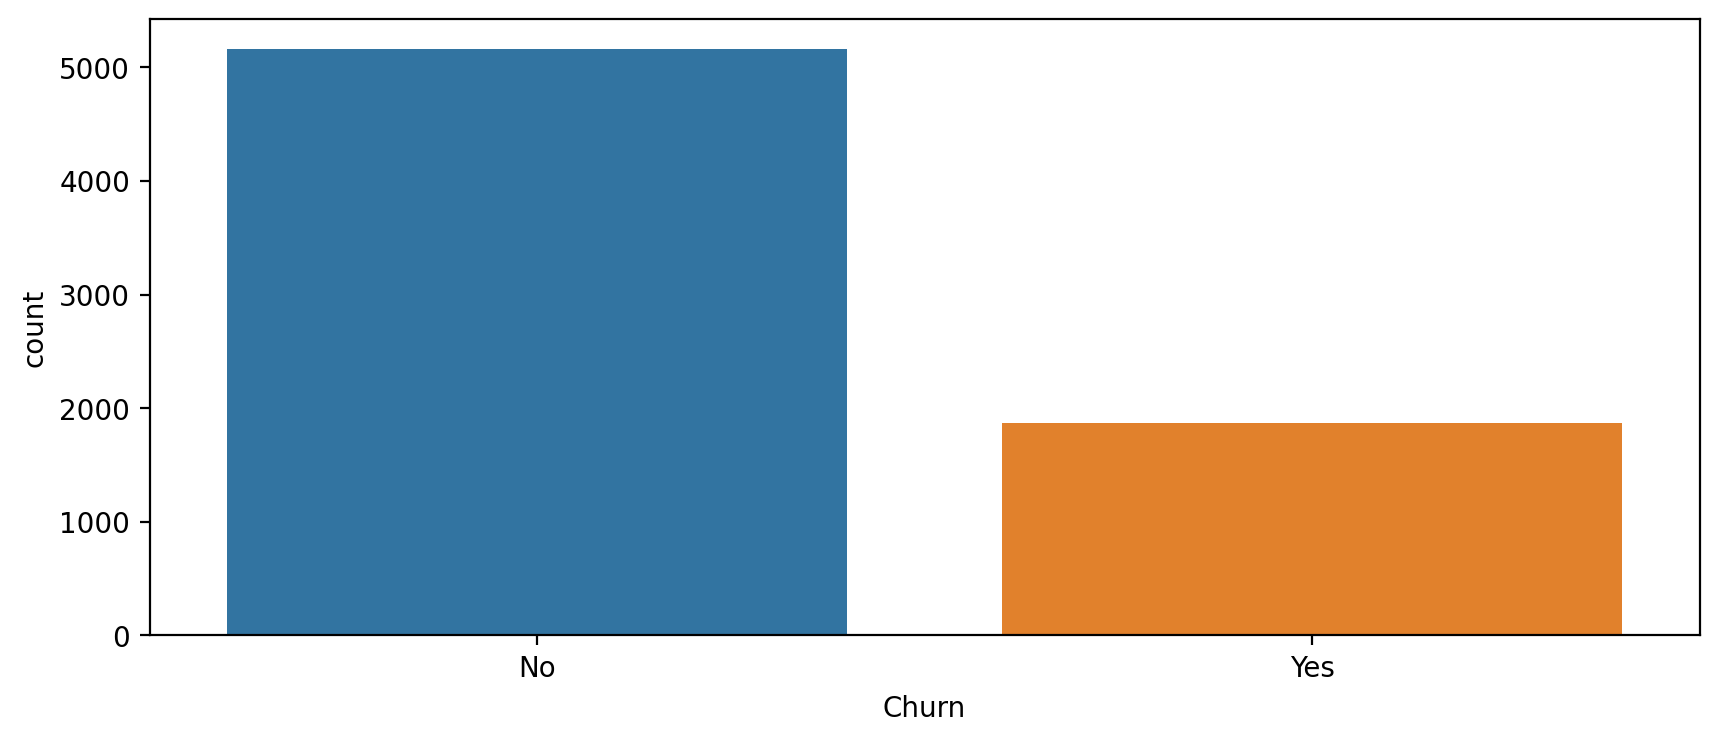

In [13]:
plt.figure(figsize=(10,4),dpi=200)
#countplot to display the balance of class label(churn)
sns.countplot(data=df,x='Churn')

<Figure size 2000x800 with 0 Axes>

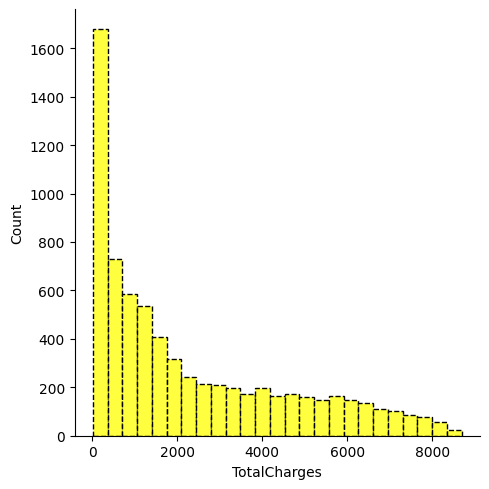

In [14]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=df,x='TotalCharges',color='yellow',ls='--')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

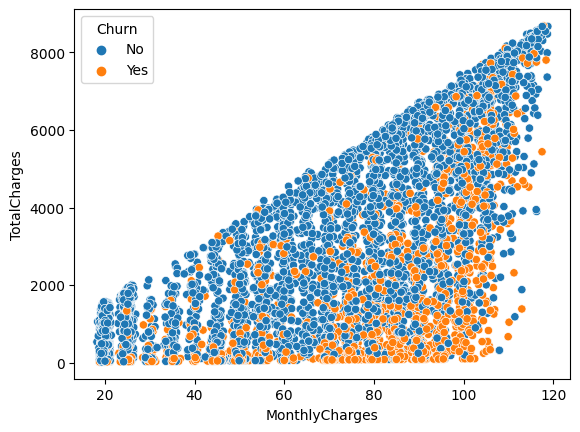

In [15]:

sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn')

<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

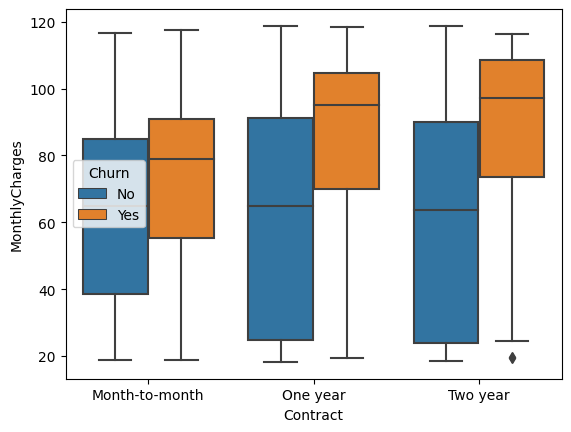

In [16]:

sns.boxplot(data=df,x='Contract',y='MonthlyCharges',hue='Churn')

<Axes: xlabel='Contract', ylabel='TotalCharges'>

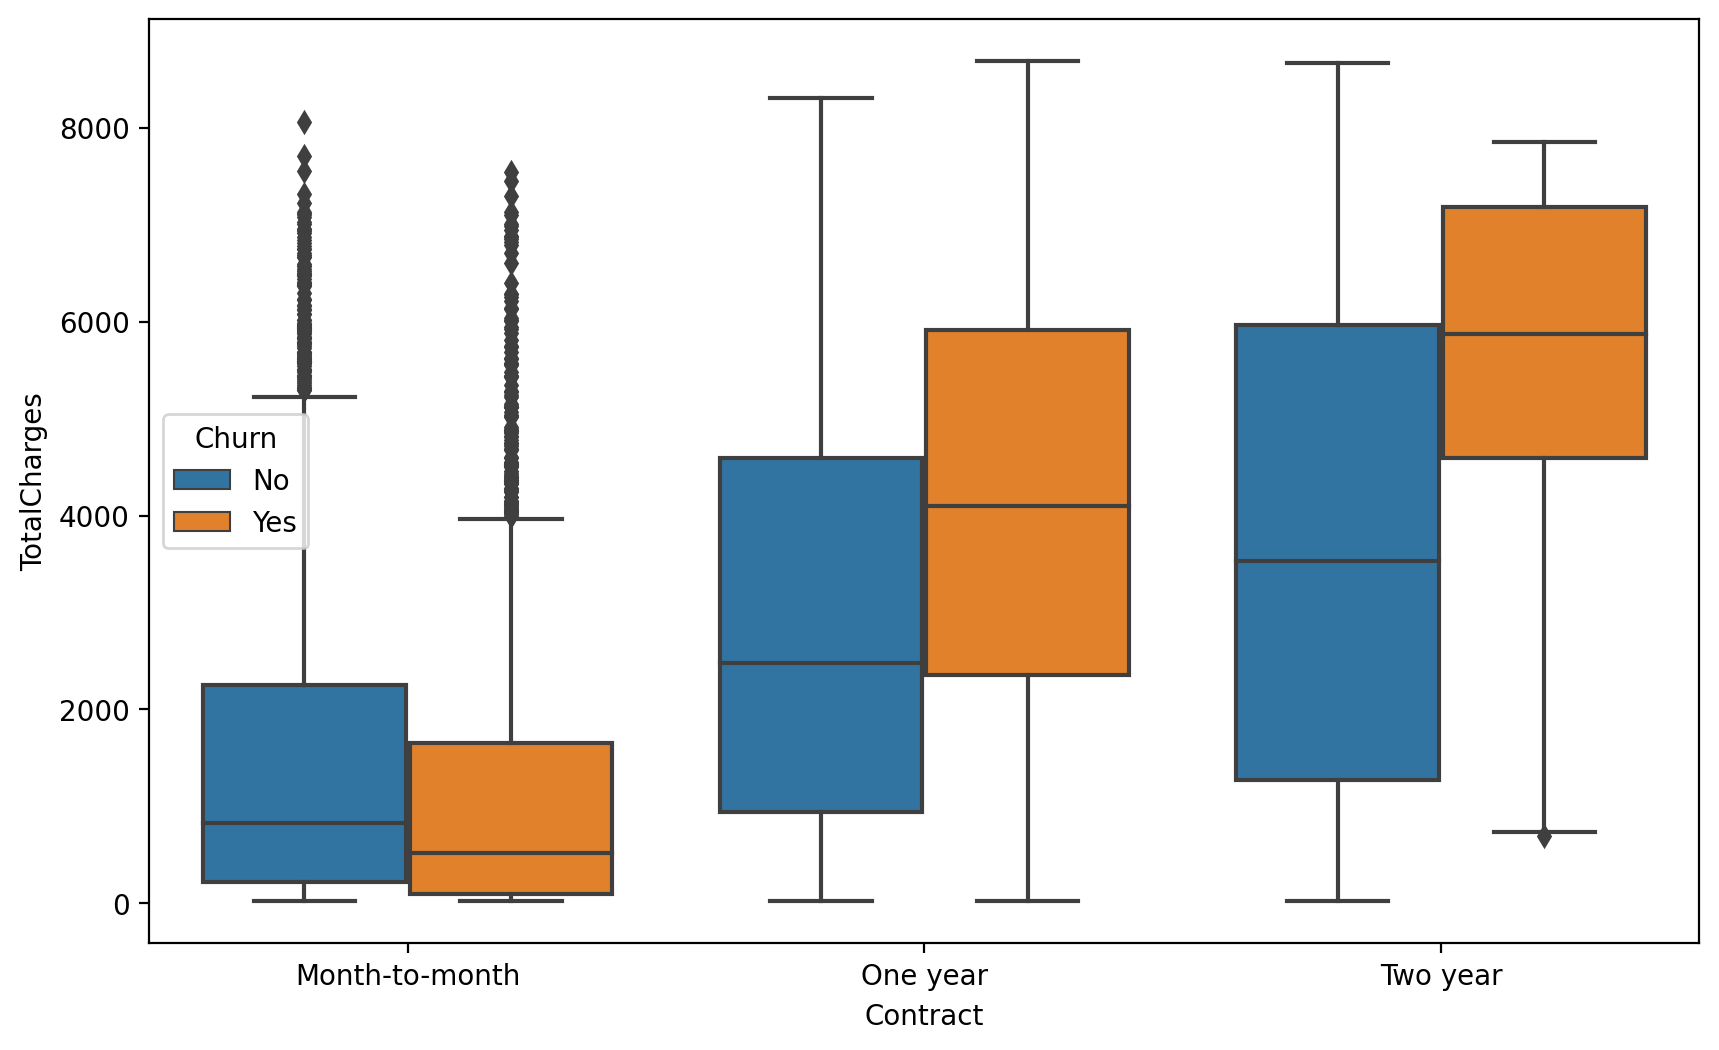

In [17]:
#box plot for distribution of total charges per contract type, adding churn as hue coloring
plt.figure(figsize=(10,6),dpi=200)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')

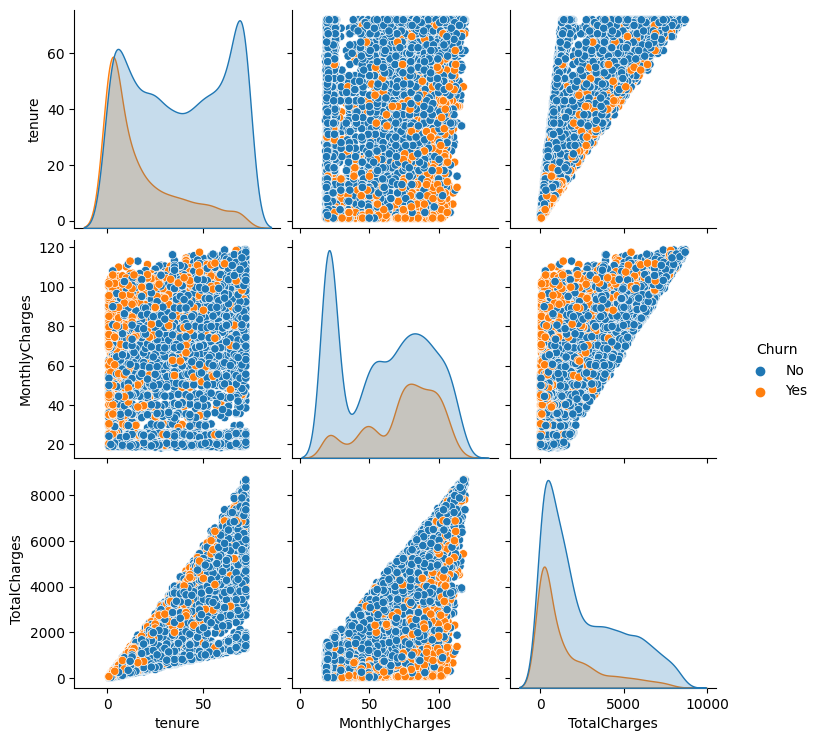

In [18]:
sns.pairplot(df.drop('SeniorCitizen',axis=1),hue='Churn')

## Feature Importance :

In [19]:
dummies=pd.get_dummies(df.drop(['tenure','MonthlyCharges','TotalCharges','customerID'],axis=1))

In [20]:
correlation=dummies.corr()

<Axes: >

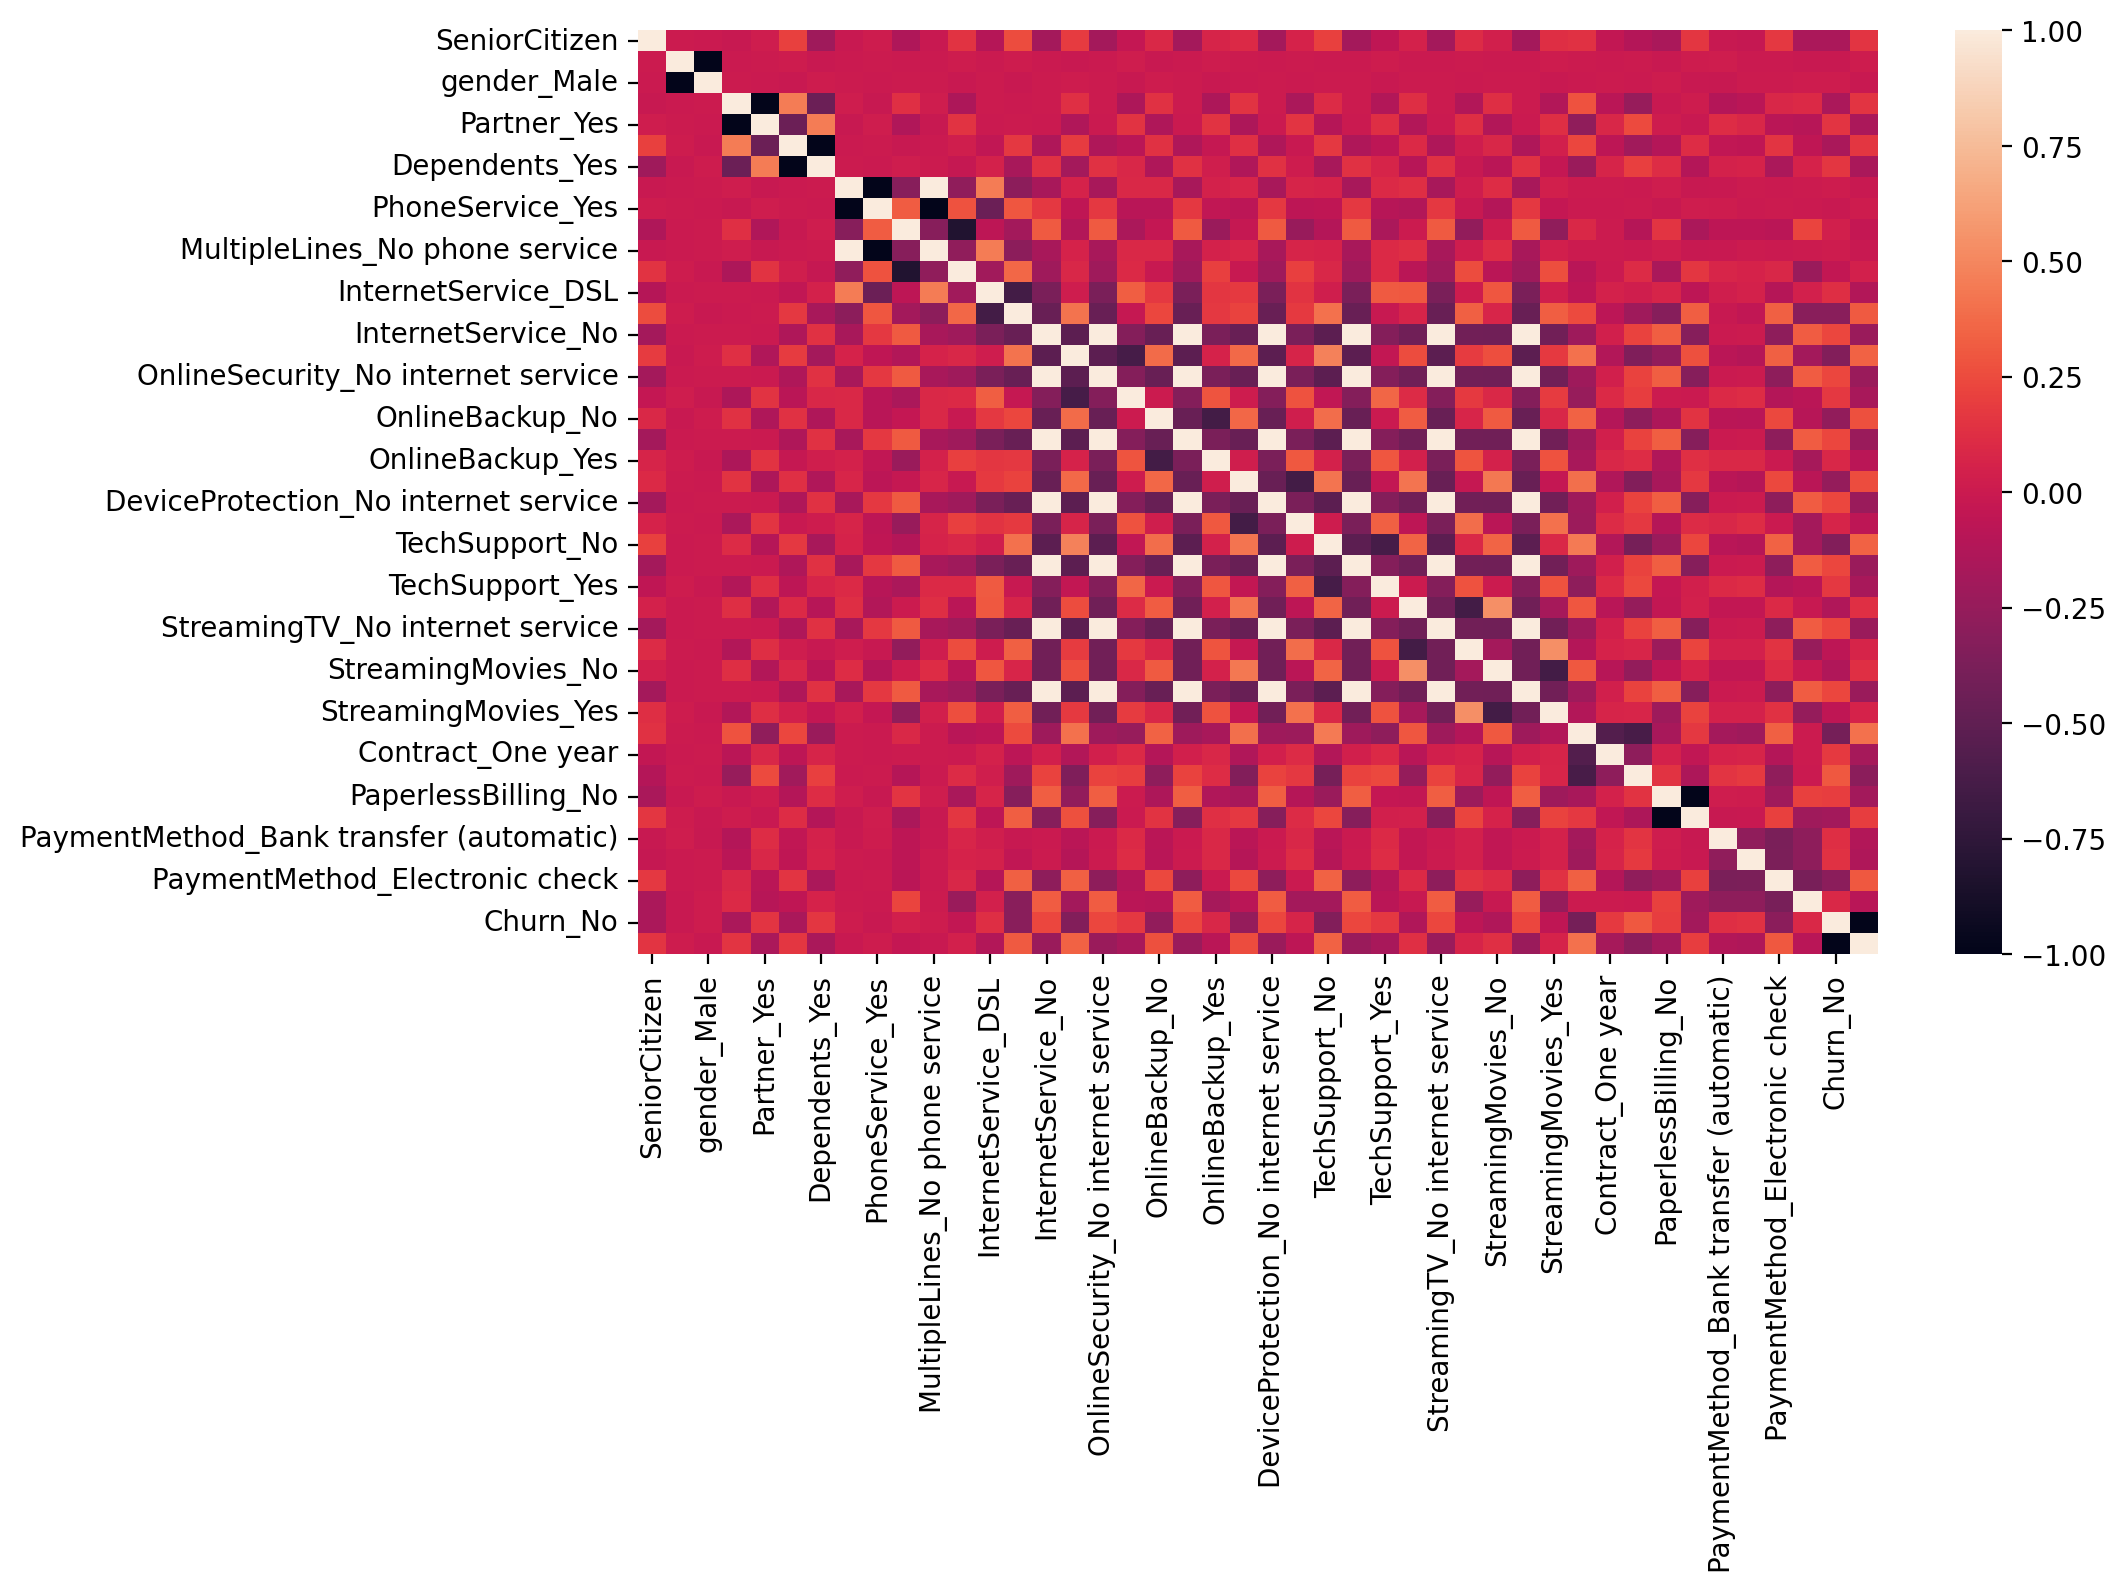

In [21]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(correlation)

<Axes: >

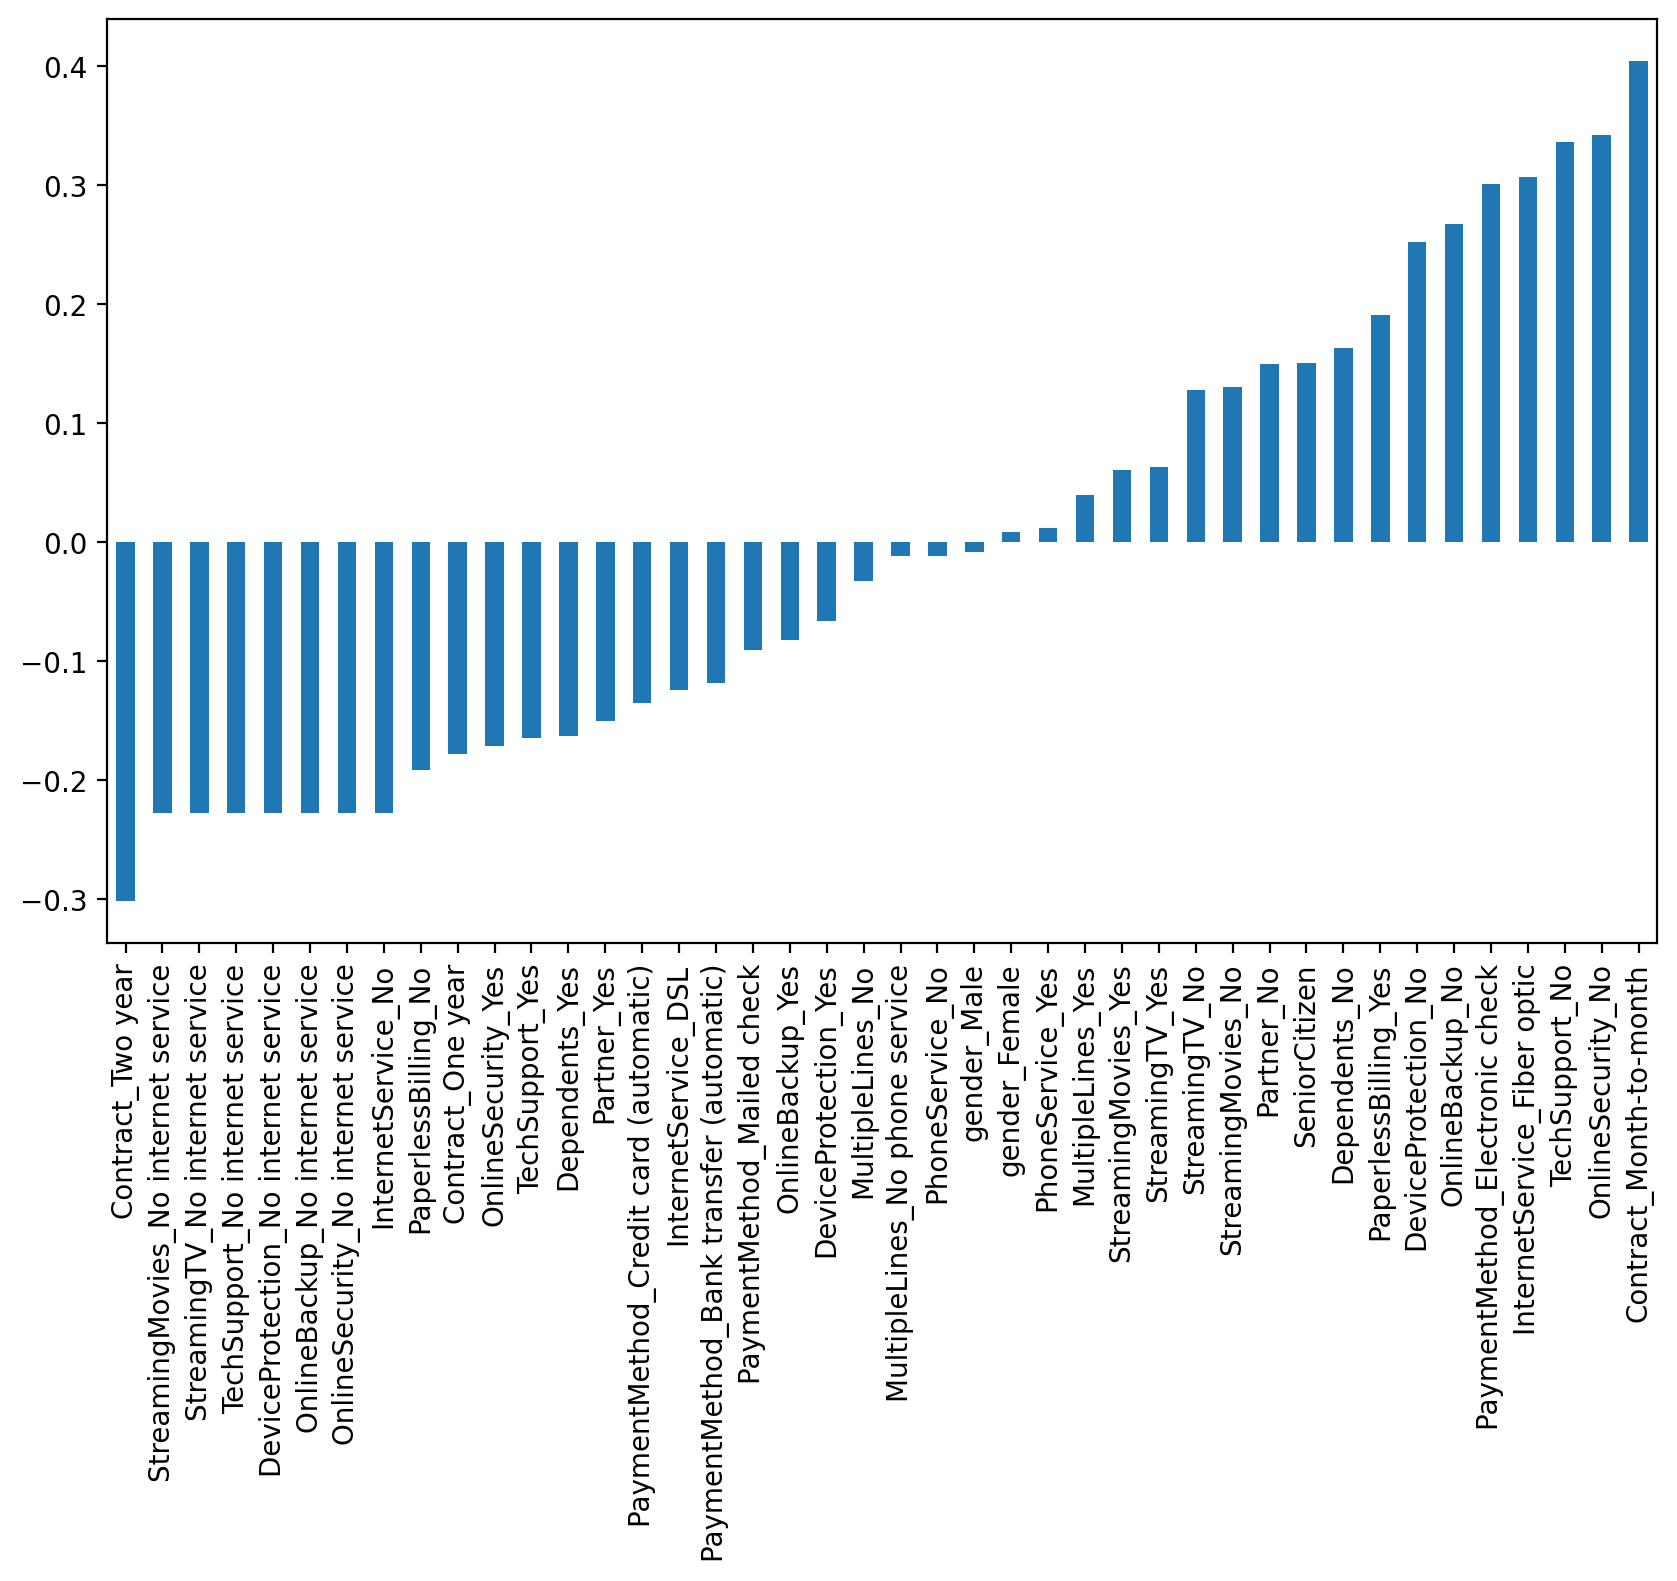

In [22]:
plt.figure(figsize=(10,6),dpi=200)
correlation['Churn_Yes'].sort_values().iloc[1:-1].plot(kind='bar')

In [23]:
#a function to classify people to a particular tenure class.
def coh(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 months'

In [24]:
#adding tenure class into dataframe
df['tenure class']=df['tenure'].apply(coh)

In [25]:
df['tenure class']

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 months
Name: tenure class, Length: 7032, dtype: object

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

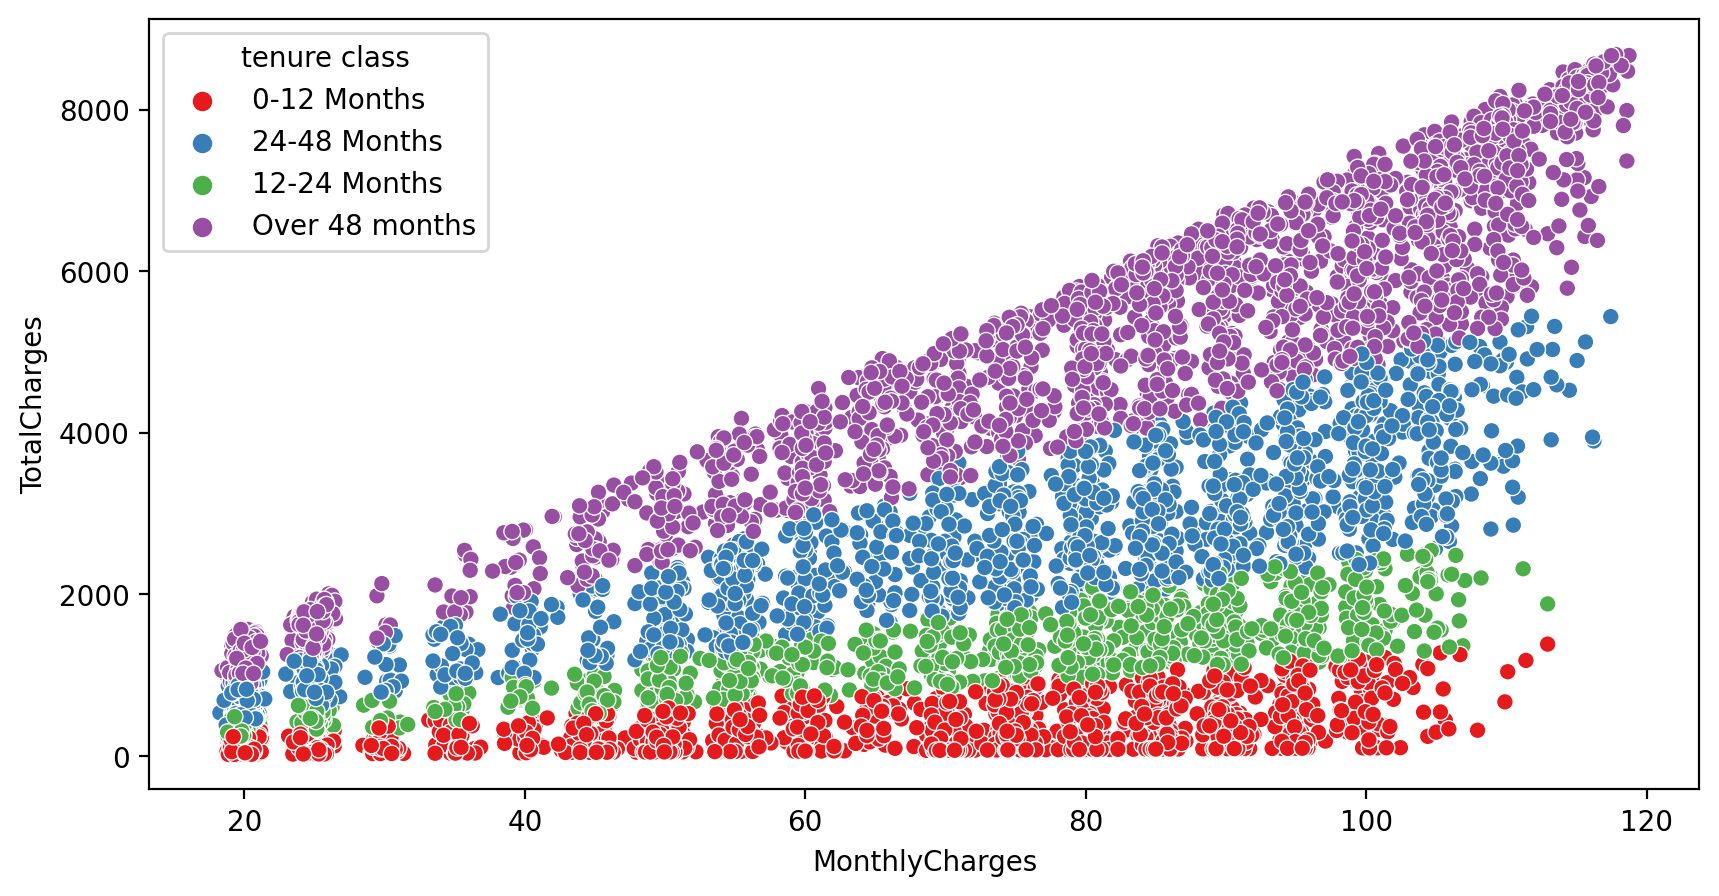

In [26]:
#scatterplot between total charges and monthly charges colored by tenure class
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='tenure class',palette='Set1')

<Figure size 2000x1000 with 0 Axes>

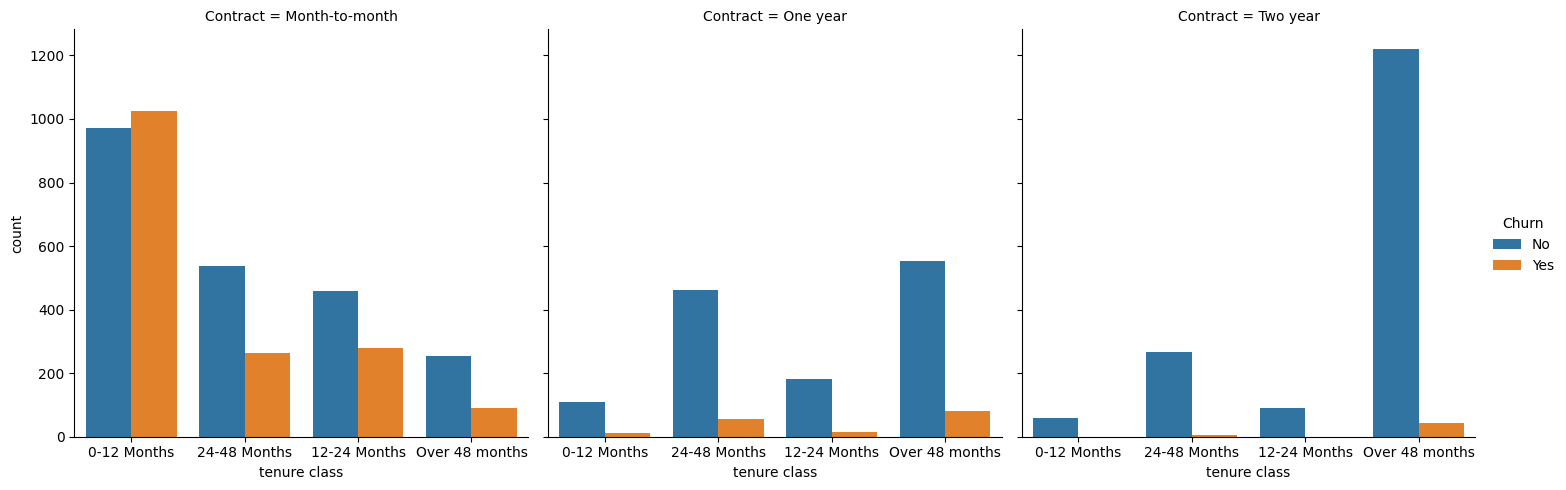

In [27]:
#catplot for showing counts per tenure class separated by contract type and colored by churn
plt.figure(figsize=(10,5),dpi=200)
sns.catplot(data=df,x='tenure class',hue='Churn',col='Contract',kind='count')

In [28]:
c_no=df.groupby(['Churn','tenure']).count().transpose()["No"]
c_yes=df.groupby(['Churn','tenure']).count().transpose()["Yes"]

In [29]:
c_rate=100*c_yes/(c_no+c_yes)

In [30]:
c_rate.transpose()['tenure class']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: tenure class, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

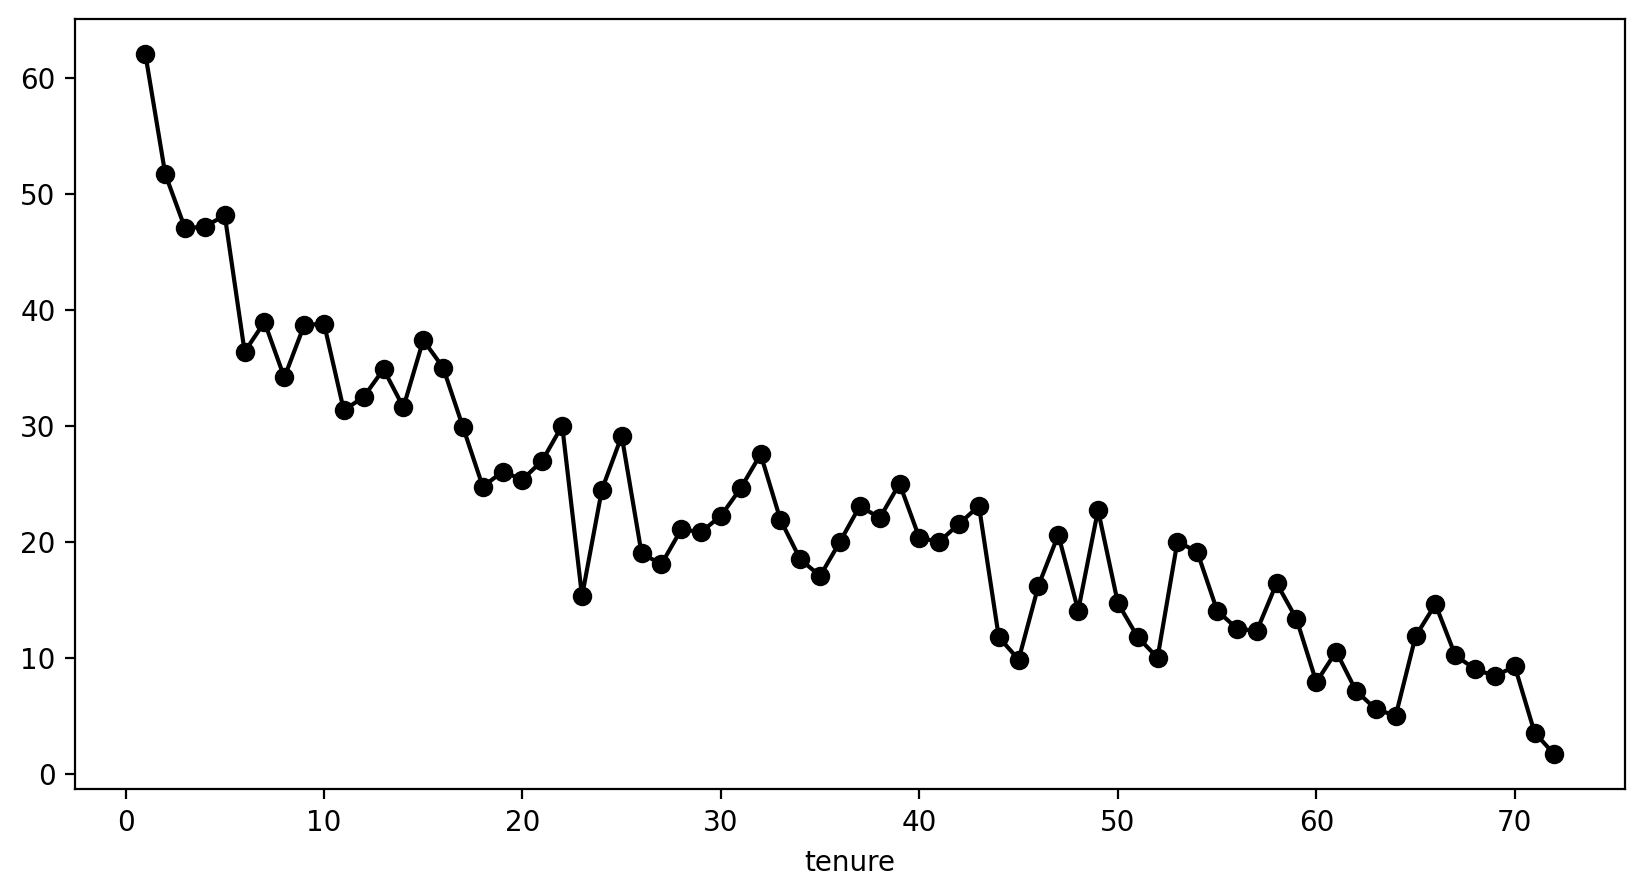

In [31]:
plt.figure(figsize=(10,5),dpi=200)
c_rate.iloc[-1].plot(color='black',marker='o')

In [32]:
df=df.drop('customerID',axis=1)


In [45]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure class
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24 Months
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Over 48 months
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Months
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Months


In [33]:
#taking dummy variables for categorical columns and dropping churn column
X=pd.get_dummies(df.drop('Churn',axis=1))

In [47]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [34]:
y=df['Churn']

## Train Test Split :

In [35]:

#splitting X and y into train and test data


In [36]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Feature Engineering :

In [37]:
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Machine Learning Algorithms:


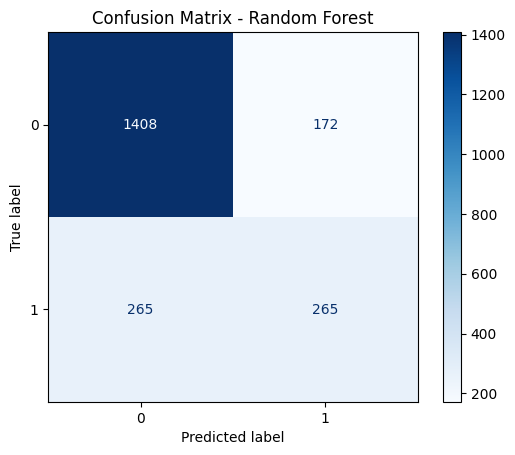

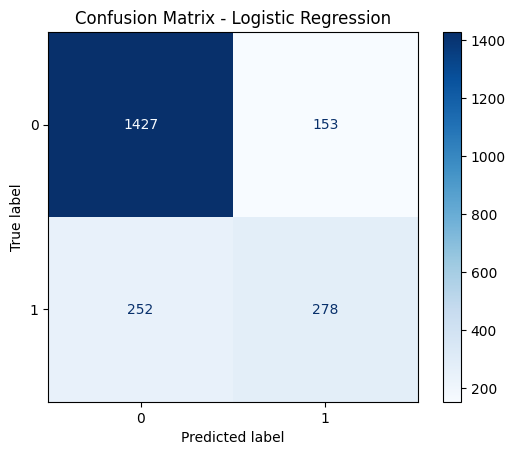

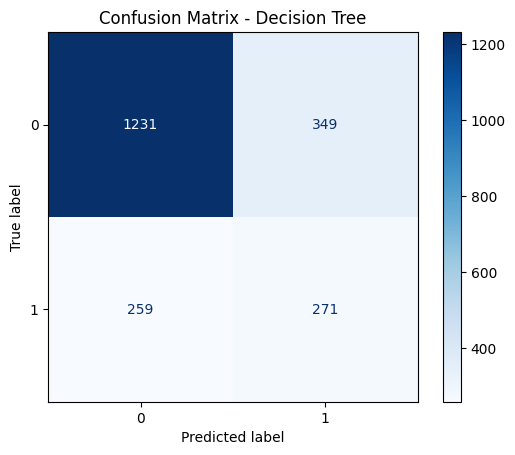

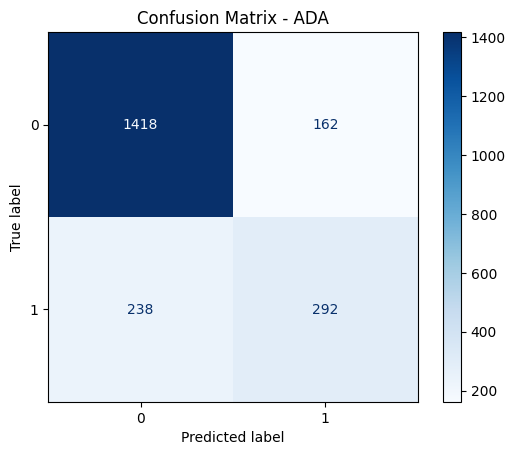

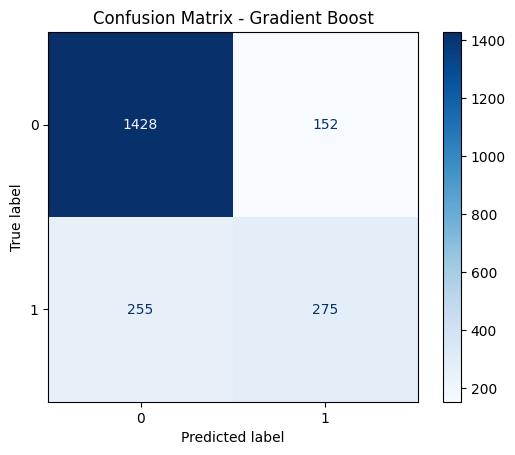

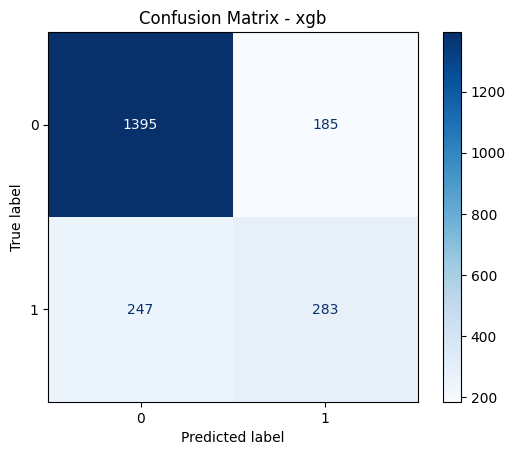

In [39]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree',DecisionTreeClassifier()),
    ('ADA',AdaBoostClassifier()),
    ('Gradient Boost',GradientBoostingClassifier()),
    ('xgb',xgb.XGBClassifier(objective='binary:logistic',random_state=42))
]

# Compare classification metrics for each model
metrics_list = []
for name, model in models:
    y_train = y_train.replace({'No': 0, 'Yes': 1})
    y_test = y_test.replace({'No': 0, 'Yes': 1})
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    
    disp = ConfusionMatrixDisplay.from_predictions( y_test,predictions, cmap=plt.cm.Blues, normalize=None)
    disp.ax_.set_title(f'Confusion Matrix - {name}')
    
    metrics_dict = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    metrics_list.append(metrics_dict)

In [40]:
metrics_df = pd.DataFrame(metrics_list)

# Print the DataFrame
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.792891   0.782525  0.792891  0.785892
1  Logistic Regression  0.808057   0.798443  0.808057  0.801085
2        Decision Tree  0.711848   0.728444  0.711848  0.718900
3                  ADA  0.810427   0.802751  0.810427  0.805332
4       Gradient Boost  0.807109   0.797128  0.807109  0.799773
5                  xgb  0.795261   0.788065  0.795261  0.790871


In [41]:
final_ada=AdaBoostClassifier(n_estimators=64)

In [42]:
final_ada.fit(X,y)

AdaBoostClassifier(n_estimators=64)

In [43]:
import joblib

In [44]:
from joblib import dump